In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"
key = "lambda"
quantile = "2"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.33it/s]

12it [00:00,  4.69it/s]

22it [00:00,  6.55it/s]

33it [00:00,  9.11it/s]

43it [00:00, 12.52it/s]

53it [00:00, 16.87it/s]

63it [00:00, 22.47it/s]

73it [00:01, 29.24it/s]

85it [00:01, 37.72it/s]

97it [00:01, 47.36it/s]

109it [00:01, 57.68it/s]

121it [00:01, 67.92it/s]

133it [00:01, 77.35it/s]

145it [00:01, 85.02it/s]

157it [00:01, 91.44it/s]

169it [00:01, 89.02it/s]

180it [00:02, 90.42it/s]

191it [00:02, 94.85it/s]

202it [00:02, 97.85it/s]

213it [00:02, 101.02it/s]

225it [00:02, 104.27it/s]

236it [00:02, 99.59it/s] 

248it [00:02, 103.81it/s]

260it [00:02, 106.93it/s]

272it [00:02, 109.54it/s]

284it [00:02, 111.29it/s]

296it [00:03, 110.82it/s]

308it [00:03, 112.87it/s]

320it [00:03, 114.13it/s]

332it [00:03, 113.25it/s]

344it [00:03, 102.75it/s]

355it [00:03, 101.50it/s]

366it [00:03, 99.31it/s] 

377it [00:03, 101.55it/s]

388it [00:03, 102.35it/s]

399it [00:04, 98.58it/s] 

411it [00:04, 102.46it/s]

423it [00:04, 105.83it/s]

435it [00:04, 109.45it/s]

447it [00:04, 111.43it/s]

459it [00:04, 112.92it/s]

471it [00:04, 112.70it/s]

483it [00:04, 113.77it/s]

495it [00:04, 110.26it/s]

507it [00:05, 110.73it/s]

519it [00:05, 111.33it/s]

531it [00:05, 112.24it/s]

543it [00:05, 96.15it/s] 

554it [00:05, 91.04it/s]

566it [00:05, 96.54it/s]

578it [00:05, 101.83it/s]

590it [00:05, 105.27it/s]

602it [00:05, 106.92it/s]

613it [00:06, 107.23it/s]

625it [00:06, 108.57it/s]

637it [00:06, 110.22it/s]

649it [00:06, 112.37it/s]

661it [00:06, 112.46it/s]

673it [00:06, 109.63it/s]

685it [00:06, 111.59it/s]

697it [00:06, 112.67it/s]

709it [00:07, 98.84it/s] 

721it [00:07, 103.03it/s]

733it [00:07, 105.70it/s]

744it [00:07, 90.49it/s] 

756it [00:07, 96.00it/s]

767it [00:07, 84.72it/s]

778it [00:07, 89.80it/s]

790it [00:07, 96.81it/s]

802it [00:07, 102.43it/s]

814it [00:08, 106.40it/s]

826it [00:08, 108.68it/s]

838it [00:08, 110.34it/s]

850it [00:08, 110.06it/s]

862it [00:08, 111.78it/s]

874it [00:08, 106.75it/s]

885it [00:08, 96.85it/s] 

895it [00:08, 86.93it/s]

905it [00:09, 82.11it/s]

915it [00:09, 85.53it/s]

927it [00:09, 91.85it/s]

939it [00:09, 97.39it/s]

951it [00:09, 102.14it/s]

963it [00:09, 105.80it/s]

975it [00:09, 107.52it/s]

987it [00:09, 108.76it/s]

999it [00:09, 110.04it/s]

1011it [00:09, 111.40it/s]

1023it [00:10, 103.11it/s]

1035it [00:10, 106.74it/s]

1047it [00:10, 109.64it/s]

1059it [00:10, 111.75it/s]

1071it [00:10, 113.46it/s]

1083it [00:10, 113.45it/s]

1095it [00:10, 114.05it/s]

1107it [00:10, 114.75it/s]

1119it [00:10, 115.39it/s]

1131it [00:11, 110.52it/s]

1143it [00:11, 109.87it/s]

1155it [00:11, 111.66it/s]

1167it [00:11, 112.83it/s]

1179it [00:11, 113.54it/s]

1191it [00:11, 114.13it/s]

1203it [00:11, 113.18it/s]

1215it [00:11, 112.21it/s]

1227it [00:11, 112.45it/s]

1239it [00:12, 95.97it/s] 

1251it [00:12, 100.29it/s]

1263it [00:12, 104.63it/s]

1275it [00:12, 107.42it/s]

1287it [00:12, 109.70it/s]

1299it [00:12, 111.32it/s]

1311it [00:12, 112.44it/s]

1323it [00:12, 112.60it/s]

1335it [00:12, 113.33it/s]

1347it [00:13, 113.71it/s]

1359it [00:13, 92.32it/s] 

1369it [00:13, 87.30it/s]

1379it [00:13, 83.22it/s]

1388it [00:13, 83.82it/s]

1399it [00:13, 88.72it/s]

1411it [00:13, 94.68it/s]

1423it [00:13, 99.91it/s]

1435it [00:13, 103.50it/s]

1447it [00:14, 105.24it/s]

1458it [00:14, 91.58it/s] 

1469it [00:14, 94.78it/s]

1481it [00:14, 100.57it/s]

1492it [00:14, 95.26it/s] 

1504it [00:14, 99.89it/s]

1516it [00:14, 102.88it/s]

1528it [00:14, 105.46it/s]

1540it [00:15, 107.75it/s]

1551it [00:15, 108.27it/s]

1563it [00:15, 109.72it/s]

1575it [00:15, 108.33it/s]

1587it [00:15, 109.39it/s]

1599it [00:15, 110.90it/s]

1611it [00:15, 112.46it/s]

1623it [00:15, 113.62it/s]

1635it [00:15, 114.14it/s]

1647it [00:15, 114.01it/s]

1659it [00:16, 114.93it/s]

1671it [00:16, 115.72it/s]

1683it [00:16, 115.14it/s]

1695it [00:16, 115.44it/s]

1707it [00:16, 115.99it/s]

1719it [00:16, 112.81it/s]

1731it [00:16, 112.85it/s]

1743it [00:16, 112.08it/s]

1755it [00:16, 109.34it/s]

1767it [00:17, 111.09it/s]

1779it [00:17, 112.13it/s]

1791it [00:17, 113.29it/s]

1803it [00:17, 113.75it/s]

1815it [00:17, 113.69it/s]

1827it [00:17, 99.35it/s] 

1838it [00:17, 90.55it/s]

1848it [00:17, 86.36it/s]

1859it [00:17, 90.45it/s]

1871it [00:18, 96.28it/s]

1883it [00:18, 101.38it/s]

1895it [00:18, 103.99it/s]

1907it [00:18, 107.19it/s]

1919it [00:18, 109.03it/s]

1931it [00:18, 110.41it/s]

1943it [00:18, 109.13it/s]

1955it [00:18, 110.74it/s]

1967it [00:18, 112.08it/s]

1979it [00:19, 112.33it/s]

1991it [00:19, 108.70it/s]

2002it [00:19, 106.04it/s]

2014it [00:19, 107.32it/s]

2026it [00:19, 108.99it/s]

2038it [00:19, 109.93it/s]

2050it [00:19, 111.36it/s]

2062it [00:19, 112.11it/s]

2074it [00:19, 107.74it/s]

2085it [00:20, 101.26it/s]

2097it [00:20, 104.88it/s]

2109it [00:20, 106.70it/s]

2121it [00:20, 108.19it/s]

2133it [00:20, 109.79it/s]

2145it [00:20, 109.53it/s]

2156it [00:20, 107.26it/s]

2167it [00:20, 92.85it/s] 

2177it [00:20, 91.47it/s]

2187it [00:21, 91.15it/s]

2197it [00:21, 92.20it/s]

2207it [00:21, 92.71it/s]

2219it [00:21, 98.93it/s]

2231it [00:21, 103.70it/s]

2243it [00:21, 106.77it/s]

2254it [00:21, 106.82it/s]

2266it [00:21, 109.16it/s]

2278it [00:21, 108.33it/s]

2290it [00:22, 110.29it/s]

2302it [00:22, 110.60it/s]

2314it [00:22, 112.30it/s]

2326it [00:22, 113.38it/s]

2338it [00:22, 114.05it/s]

2350it [00:22, 114.84it/s]

2362it [00:22, 115.50it/s]

2374it [00:22, 114.57it/s]

2386it [00:22, 114.09it/s]

2398it [00:22, 114.67it/s]

2410it [00:23, 84.37it/s] 

2422it [00:23, 91.99it/s]

2434it [00:23, 97.62it/s]

2445it [00:23, 88.64it/s]

2455it [00:23, 84.61it/s]

2465it [00:23, 87.70it/s]

2477it [00:23, 94.33it/s]

2488it [00:24, 97.27it/s]

2500it [00:24, 101.78it/s]

2512it [00:24, 105.34it/s]

2523it [00:24, 94.45it/s] 

2533it [00:24, 85.85it/s]

2543it [00:24, 89.37it/s]

2555it [00:24, 94.45it/s]

2565it [00:24, 89.84it/s]

2577it [00:24, 95.69it/s]

2589it [00:25, 99.97it/s]

2600it [00:25, 99.00it/s]

2612it [00:25, 103.26it/s]

2624it [00:25, 106.18it/s]

2636it [00:25, 108.94it/s]

2648it [00:25, 111.20it/s]

2660it [00:25, 112.05it/s]

2672it [00:25, 112.22it/s]

2684it [00:26, 87.08it/s] 

2694it [00:26, 79.84it/s]

2703it [00:26, 81.50it/s]

2715it [00:26, 89.52it/s]

2727it [00:26, 96.30it/s]

2739it [00:26, 101.16it/s]

2750it [00:26, 97.47it/s] 

2762it [00:26, 101.82it/s]

2774it [00:26, 105.70it/s]

2786it [00:27, 108.80it/s]

2798it [00:27, 100.86it/s]

2809it [00:27, 103.00it/s]

2821it [00:27, 106.47it/s]

2833it [00:27, 108.94it/s]

2845it [00:27, 110.23it/s]

2857it [00:27, 110.59it/s]

2869it [00:27, 111.74it/s]

2881it [00:27, 112.37it/s]

2893it [00:27, 110.12it/s]

2905it [00:28, 110.92it/s]

2917it [00:28, 111.25it/s]

2929it [00:28, 112.94it/s]

2941it [00:28, 114.17it/s]

2953it [00:28, 114.34it/s]

2965it [00:28, 113.29it/s]

2977it [00:28, 114.44it/s]

2989it [00:28, 107.57it/s]

3000it [00:28, 106.57it/s]

3011it [00:29, 100.83it/s]

3023it [00:29, 104.59it/s]

3035it [00:29, 107.52it/s]

3047it [00:29, 109.87it/s]

3059it [00:29, 111.61it/s]

3071it [00:29, 111.46it/s]

3083it [00:29, 109.75it/s]

3095it [00:29, 111.41it/s]

3107it [00:29, 112.68it/s]

3119it [00:30, 112.34it/s]

3131it [00:30, 112.45it/s]

3143it [00:30, 113.53it/s]

3155it [00:30, 114.66it/s]

3167it [00:30, 115.63it/s]

3179it [00:30, 116.26it/s]

3191it [00:30, 115.89it/s]

3203it [00:30, 114.72it/s]

3215it [00:30, 99.74it/s] 

3227it [00:31, 103.43it/s]

3239it [00:31, 106.52it/s]

3251it [00:31, 108.50it/s]

3263it [00:31, 107.07it/s]

3275it [00:31, 109.90it/s]

3287it [00:31, 111.03it/s]

3299it [00:31, 110.54it/s]

3311it [00:31, 110.94it/s]

3323it [00:31, 112.39it/s]

3335it [00:31, 113.95it/s]

3347it [00:32, 114.67it/s]

3359it [00:32, 114.88it/s]

3371it [00:32, 106.91it/s]

3383it [00:32, 109.61it/s]

3395it [00:32, 111.74it/s]

3407it [00:32, 112.62it/s]

3419it [00:32, 113.14it/s]

3431it [00:32, 113.02it/s]

3443it [00:32, 110.89it/s]

3455it [00:33, 97.44it/s] 

3466it [00:33, 90.18it/s]

3477it [00:33, 95.14it/s]

3488it [00:33, 98.76it/s]

3500it [00:33, 102.55it/s]

3511it [00:33, 104.04it/s]

3522it [00:33, 90.20it/s] 

3532it [00:33, 90.76it/s]

3544it [00:34, 96.29it/s]

3554it [00:34, 86.37it/s]

3565it [00:34, 90.41it/s]

3577it [00:34, 96.99it/s]

3589it [00:34, 102.35it/s]

3601it [00:34, 105.96it/s]

3613it [00:34, 108.92it/s]

3625it [00:34, 110.09it/s]

3637it [00:34, 106.10it/s]

3649it [00:35, 107.60it/s]

3661it [00:35, 108.47it/s]

3673it [00:35, 110.09it/s]

3685it [00:35, 111.69it/s]

3697it [00:35, 112.14it/s]

3709it [00:35, 111.96it/s]

3721it [00:35, 111.51it/s]

3733it [00:35, 111.68it/s]

3745it [00:35, 109.48it/s]

3757it [00:36, 111.71it/s]

3769it [00:36, 113.16it/s]

3781it [00:36, 113.52it/s]

3793it [00:36, 114.13it/s]

3805it [00:36, 115.02it/s]

3817it [00:36, 115.52it/s]

3829it [00:36, 115.20it/s]

3841it [00:36, 115.08it/s]

3853it [00:36, 114.65it/s]

3865it [00:36, 115.48it/s]

3877it [00:37, 114.27it/s]

3889it [00:37, 115.04it/s]

3901it [00:37, 99.56it/s] 

3912it [00:37, 101.17it/s]

3924it [00:37, 104.51it/s]

3936it [00:37, 107.86it/s]

3947it [00:37, 103.85it/s]

3958it [00:37, 95.61it/s] 

3968it [00:38, 88.56it/s]

3980it [00:38, 95.03it/s]

3992it [00:38, 100.99it/s]

4004it [00:38, 105.05it/s]

4016it [00:38, 108.10it/s]

4028it [00:38, 100.83it/s]

4039it [00:38, 93.48it/s] 

4049it [00:38, 85.64it/s]

4058it [00:38, 85.77it/s]

4069it [00:39, 91.05it/s]

4079it [00:39, 87.08it/s]

4090it [00:39, 91.71it/s]

4101it [00:39, 92.58it/s]

4113it [00:39, 98.27it/s]

4125it [00:39, 103.26it/s]

4137it [00:39, 106.81it/s]

4149it [00:39, 109.35it/s]

4150it [00:39, 104.24it/s]


0it [00:00, ?it/s]

12it [00:00, 116.73it/s]

Number of empty sat catalogs is 1


24it [00:00, 114.10it/s]

34it [00:00, 107.84it/s]

47it [00:00, 111.42it/s]

58it [00:00, 108.62it/s]

71it [00:00, 112.24it/s]

84it [00:00, 114.54it/s]

96it [00:00, 112.57it/s]

107it [00:00, 107.58it/s]

119it [00:01, 110.98it/s]

132it [00:01, 113.58it/s]

144it [00:01, 112.31it/s]

156it [00:01, 112.98it/s]

168it [00:01, 114.39it/s]

181it [00:01, 116.30it/s]

193it [00:01, 117.33it/s]

206it [00:01, 118.71it/s]

218it [00:01, 114.23it/s]

231it [00:02, 117.34it/s]

244it [00:02, 118.09it/s]

257it [00:02, 119.92it/s]

270it [00:02, 120.50it/s]

283it [00:02, 119.57it/s]

295it [00:02, 117.36it/s]

308it [00:02, 119.59it/s]

321it [00:02, 121.04it/s]

334it [00:02, 121.49it/s]

347it [00:03, 112.45it/s]

360it [00:03, 115.73it/s]

373it [00:03, 117.97it/s]

385it [00:03, 111.04it/s]

397it [00:03, 109.62it/s]

410it [00:03, 113.71it/s]

423it [00:03, 116.15it/s]

436it [00:03, 118.18it/s]

449it [00:03, 119.70it/s]

462it [00:03, 119.37it/s]

474it [00:04, 111.88it/s]

486it [00:04, 100.43it/s]

498it [00:04, 105.60it/s]

511it [00:04, 111.26it/s]

523it [00:04, 110.50it/s]

536it [00:04, 114.09it/s]

548it [00:04, 115.67it/s]

560it [00:04, 115.78it/s]

572it [00:04, 116.17it/s]

584it [00:05, 116.26it/s]

596it [00:05, 117.00it/s]

608it [00:05, 117.70it/s]

621it [00:05, 118.45it/s]

634it [00:05, 117.97it/s]

646it [00:05, 110.35it/s]

659it [00:05, 113.67it/s]

671it [00:05, 86.42it/s] 

684it [00:06, 95.09it/s]

697it [00:06, 102.43it/s]

710it [00:06, 108.06it/s]

722it [00:06, 97.31it/s] 

735it [00:06, 104.58it/s]

748it [00:06, 110.19it/s]

760it [00:06, 106.06it/s]

773it [00:06, 110.82it/s]

786it [00:06, 113.69it/s]

798it [00:07, 106.06it/s]

809it [00:07, 98.02it/s] 

821it [00:07, 103.03it/s]

834it [00:07, 107.91it/s]

847it [00:07, 111.59it/s]

860it [00:07, 115.06it/s]

873it [00:07, 118.36it/s]

886it [00:07, 119.73it/s]

899it [00:07, 120.63it/s]

912it [00:08, 117.35it/s]

925it [00:08, 119.80it/s]

938it [00:08, 120.87it/s]

951it [00:08, 121.54it/s]

964it [00:08, 122.76it/s]

977it [00:08, 122.85it/s]

990it [00:08, 122.96it/s]

1003it [00:08, 123.41it/s]

1016it [00:08, 122.80it/s]

1029it [00:09, 119.15it/s]

1041it [00:09, 112.52it/s]

1053it [00:09, 114.09it/s]

1065it [00:09, 106.73it/s]

1076it [00:09, 101.47it/s]

1089it [00:09, 107.23it/s]

1102it [00:09, 111.38it/s]

1115it [00:09, 114.85it/s]

1128it [00:09, 117.59it/s]

1141it [00:10, 119.50it/s]

1154it [00:10, 110.58it/s]

1166it [00:10, 113.10it/s]

1178it [00:10, 108.86it/s]

1191it [00:10, 113.25it/s]

1204it [00:10, 116.07it/s]

1217it [00:10, 117.41it/s]

1230it [00:10, 118.20it/s]

1243it [00:10, 119.87it/s]

1256it [00:11, 120.61it/s]

1269it [00:11, 117.10it/s]

1281it [00:11, 104.38it/s]

1292it [00:11, 95.76it/s] 

1302it [00:11, 91.63it/s]

1312it [00:11, 88.43it/s]

1322it [00:11, 87.30it/s]

1331it [00:11, 85.37it/s]

1342it [00:12, 90.83it/s]

1355it [00:12, 98.62it/s]

1368it [00:12, 106.05it/s]

1379it [00:12, 102.58it/s]

1390it [00:12, 94.75it/s] 

1400it [00:12, 89.94it/s]

1410it [00:12, 87.89it/s]

1419it [00:12, 87.11it/s]

1430it [00:12, 92.88it/s]

1443it [00:13, 100.36it/s]

1456it [00:13, 106.46it/s]

1469it [00:13, 110.84it/s]

1482it [00:13, 114.80it/s]

1495it [00:13, 116.68it/s]

1508it [00:13, 118.66it/s]

1521it [00:13, 120.45it/s]

1534it [00:13, 121.27it/s]

1547it [00:13, 104.83it/s]

1558it [00:14, 105.60it/s]

1569it [00:14, 105.03it/s]

1580it [00:14, 106.11it/s]

1592it [00:14, 107.27it/s]

1603it [00:14, 105.77it/s]

1616it [00:14, 111.16it/s]

1629it [00:14, 114.98it/s]

1642it [00:14, 117.37it/s]

1655it [00:14, 119.54it/s]

1668it [00:14, 120.56it/s]

1681it [00:15, 121.43it/s]

1694it [00:15, 122.67it/s]

1707it [00:15, 123.49it/s]

1720it [00:15, 122.91it/s]

1733it [00:15, 123.60it/s]

1746it [00:15, 123.61it/s]

1759it [00:15, 123.92it/s]

1772it [00:15, 122.30it/s]

1785it [00:15, 119.03it/s]

1798it [00:16, 120.71it/s]

1811it [00:16, 121.26it/s]

1824it [00:16, 120.83it/s]

1837it [00:16, 120.77it/s]

1850it [00:16, 92.53it/s] 

1861it [00:16, 90.46it/s]

1874it [00:16, 98.63it/s]

1886it [00:16, 102.10it/s]

1897it [00:17, 100.11it/s]

1910it [00:17, 107.06it/s]

1923it [00:17, 111.28it/s]

1936it [00:17, 115.18it/s]

1948it [00:17, 115.34it/s]

1961it [00:17, 118.00it/s]

1974it [00:17, 120.64it/s]

1987it [00:17, 121.85it/s]

2000it [00:17, 122.92it/s]

2013it [00:17, 123.20it/s]

2026it [00:18, 124.48it/s]

2039it [00:18, 125.25it/s]

2052it [00:18, 125.48it/s]

2065it [00:18, 125.55it/s]

2078it [00:18, 125.46it/s]

2091it [00:18, 126.36it/s]

2104it [00:18, 126.68it/s]

2117it [00:18, 126.74it/s]

2130it [00:18, 126.27it/s]

2143it [00:18, 126.14it/s]

2156it [00:19, 125.44it/s]

2169it [00:19, 120.98it/s]

2182it [00:19, 122.32it/s]

2195it [00:19, 117.51it/s]

2208it [00:19, 119.97it/s]

2221it [00:19, 122.04it/s]

2234it [00:19, 122.50it/s]

2247it [00:19, 122.93it/s]

2260it [00:19, 122.89it/s]

2273it [00:20, 122.94it/s]

2286it [00:20, 122.84it/s]

2299it [00:20, 122.61it/s]

2312it [00:20, 104.49it/s]

2323it [00:20, 96.66it/s] 

2334it [00:20, 91.92it/s]

2346it [00:20, 98.39it/s]

2358it [00:20, 103.93it/s]

2370it [00:21, 107.75it/s]

2383it [00:21, 112.20it/s]

2396it [00:21, 115.87it/s]

2409it [00:21, 117.53it/s]

2421it [00:21, 100.52it/s]

2434it [00:21, 106.47it/s]

2447it [00:21, 112.10it/s]

2460it [00:21, 115.95it/s]

2473it [00:21, 118.31it/s]

2486it [00:22, 118.19it/s]

2499it [00:22, 119.09it/s]

2512it [00:22, 121.14it/s]

2525it [00:22, 121.63it/s]

2538it [00:22, 123.00it/s]

2551it [00:22, 124.10it/s]

2564it [00:22, 124.26it/s]

2577it [00:22, 124.93it/s]

2590it [00:22, 124.39it/s]

2603it [00:22, 123.32it/s]

2616it [00:23, 123.67it/s]

2629it [00:23, 124.41it/s]

2642it [00:23, 123.33it/s]

2655it [00:23, 124.68it/s]

2668it [00:23, 125.19it/s]

2681it [00:23, 125.14it/s]

2694it [00:23, 125.72it/s]

2707it [00:23, 109.41it/s]

2719it [00:23, 100.69it/s]

2730it [00:24, 95.28it/s] 

2740it [00:24, 91.42it/s]

2750it [00:24, 93.13it/s]

2763it [00:24, 100.77it/s]

2776it [00:24, 107.35it/s]

2789it [00:24, 111.86it/s]

2802it [00:24, 114.98it/s]

2815it [00:24, 118.42it/s]

2828it [00:24, 120.60it/s]

2841it [00:25, 117.56it/s]

2853it [00:25, 116.91it/s]

2866it [00:25, 118.83it/s]

2879it [00:25, 119.77it/s]

2892it [00:25, 120.35it/s]

2905it [00:25, 117.02it/s]

2918it [00:25, 119.32it/s]

2931it [00:25, 120.95it/s]

2944it [00:25, 121.28it/s]

2957it [00:26, 120.95it/s]

2970it [00:26, 119.53it/s]

2983it [00:26, 120.21it/s]

2996it [00:26, 119.09it/s]

3008it [00:26, 102.75it/s]

3019it [00:26, 97.04it/s] 

3030it [00:26, 93.53it/s]

3040it [00:26, 90.59it/s]

3050it [00:27, 89.34it/s]

3060it [00:27, 88.24it/s]

3069it [00:27, 86.67it/s]

3078it [00:27, 86.01it/s]

3087it [00:27, 83.78it/s]

3098it [00:27, 89.55it/s]

3111it [00:27, 97.14it/s]

3124it [00:27, 102.83it/s]

3135it [00:27, 96.81it/s] 

3145it [00:28, 89.18it/s]

3156it [00:28, 92.97it/s]

3169it [00:28, 100.66it/s]

3181it [00:28, 104.92it/s]

3194it [00:28, 109.68it/s]

3207it [00:28, 114.06it/s]

3219it [00:28, 115.58it/s]

3232it [00:28, 118.55it/s]

3245it [00:28, 120.11it/s]

3258it [00:28, 121.07it/s]

3271it [00:29, 115.38it/s]

3284it [00:29, 117.88it/s]

3296it [00:29, 116.11it/s]

3308it [00:29, 115.23it/s]

3320it [00:29, 105.40it/s]

3333it [00:29, 110.67it/s]

3346it [00:29, 114.90it/s]

3359it [00:29, 117.35it/s]

3372it [00:29, 119.41it/s]

3385it [00:30, 120.69it/s]

3398it [00:30, 122.62it/s]

3411it [00:30, 122.53it/s]

3424it [00:30, 121.28it/s]

3437it [00:30, 121.20it/s]

3450it [00:30, 120.95it/s]

3463it [00:30, 120.27it/s]

3476it [00:30, 120.64it/s]

3489it [00:30, 121.07it/s]

3502it [00:31, 120.06it/s]

3515it [00:31, 120.99it/s]

3528it [00:31, 121.17it/s]

3541it [00:31, 119.87it/s]

3553it [00:31, 119.61it/s]

3566it [00:31, 120.86it/s]

3579it [00:31, 122.23it/s]

3592it [00:31, 121.48it/s]

3605it [00:31, 121.77it/s]

3618it [00:32, 111.04it/s]

3631it [00:32, 114.86it/s]

3644it [00:32, 117.35it/s]

3657it [00:32, 120.35it/s]

3670it [00:32, 121.35it/s]

3683it [00:32, 109.09it/s]

3696it [00:32, 113.22it/s]

3708it [00:32, 111.97it/s]

3721it [00:32, 116.02it/s]

3734it [00:33, 119.08it/s]

3747it [00:33, 121.26it/s]

3760it [00:33, 104.36it/s]

3771it [00:33, 104.95it/s]

3783it [00:33, 106.88it/s]

3796it [00:33, 111.87it/s]

3809it [00:33, 115.61it/s]

3822it [00:33, 118.77it/s]

3835it [00:33, 120.57it/s]

3848it [00:34, 121.43it/s]

3861it [00:34, 122.89it/s]

3874it [00:34, 122.94it/s]

3887it [00:34, 115.95it/s]

3899it [00:34, 104.25it/s]

3910it [00:34, 99.63it/s] 

3923it [00:34, 105.73it/s]

3934it [00:34, 97.80it/s] 

3947it [00:34, 104.55it/s]

3960it [00:35, 109.72it/s]

3973it [00:35, 113.26it/s]

3985it [00:35, 114.81it/s]

3998it [00:35, 118.05it/s]

4010it [00:35, 102.84it/s]

4021it [00:35, 94.43it/s] 

4033it [00:35, 100.11it/s]

4046it [00:35, 105.84it/s]

4059it [00:35, 109.91it/s]

4071it [00:36, 112.69it/s]

4083it [00:36, 114.24it/s]

4096it [00:36, 117.76it/s]

4109it [00:36, 119.36it/s]

4122it [00:36, 120.01it/s]

4135it [00:36, 121.93it/s]

4148it [00:36, 123.32it/s]

4150it [00:36, 113.05it/s]

Number of empty sat catalogs is 1


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

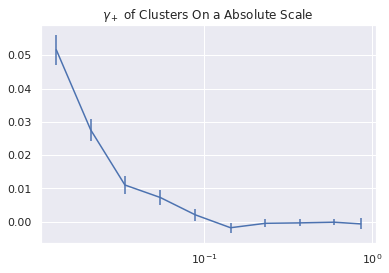

Aggregated xi:
[-32.3689 -38.1503 -24.2514 -27.4349 -12.8157  18.0355   6.9034   6.8667
   2.6743   5.6783]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2712.8078  -5321.3965  -7432.1923 -10898.1879 -14765.2038 -19728.4192
 -22503.4796 -21346.9428 -12378.5248  -1397.5918]
------------------------------------------------------------------------------
Aggregated npairs:
[  627.  1380.  2195.  3756.  6098. 10180. 15421. 21631. 23920.  9090.]
------------------------------------------------------------------------------
Mean xi:
[-0.0516 -0.0276 -0.011  -0.0073 -0.0021  0.0018  0.0004  0.0003  0.0001
  0.0006]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3266 -3.8561 -3.386  -2.9015 -2.4213 -1.938  -1.4593 -0.9869 -0.5175
 -0.1538]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

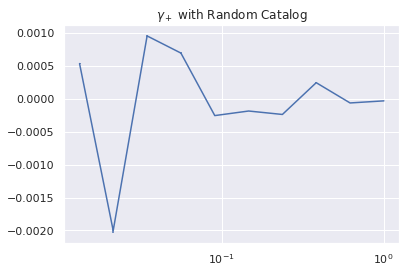

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-8.3524e-06  3.1095e-05 -1.4880e-05 -1.0828e-05  3.9369e-06  2.8573e-06
  3.6694e-06 -3.8352e-06  9.5228e-07  4.5696e-07]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

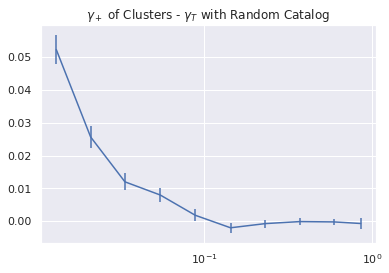

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

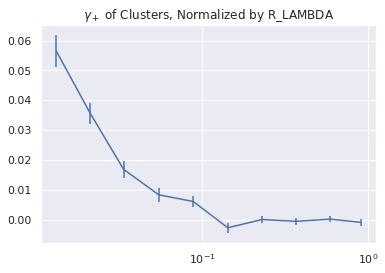

Aggregated xi:
[-22.9978 -38.2227 -31.4542 -25.6965 -30.6472  23.2648  -0.0622  11.8684
  -2.9927  16.9372]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1761.246   -4132.5878  -6343.7114  -9022.9786 -12303.7435 -16310.3578
 -19352.7693 -19414.2655 -12810.189   -1939.4061]
------------------------------------------------------------------------------
Aggregated npairs:
[  407.  1071.  1869.  3104.  5064.  8369. 13112. 19358. 24078. 17959.]
------------------------------------------------------------------------------
Mean xi:
[-5.6506e-02 -3.5689e-02 -1.6829e-02 -8.2785e-03 -6.0520e-03  2.7799e-03
 -4.7429e-06  6.1310e-04 -1.2429e-04  9.4310e-04]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3274 -3.8586 -3.3942 -2.9069 -2.4296 -1.9489 -1.476  -1.0029 -0.532
 -0.108 ]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)